### Module to collect  gridded UV and temperature data

In [1]:
# General dependencies
import datetime as dt
import pandas as pd

# APIs dependencies
import json
import requests
from pprint import pprint
from resources.api_keys import owm_api_key as owm_key

# Mapping dependencies
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

# API endpoint
url_hstr = 'https://api.openweathermap.org/data/2.5/uvi/history?'
url_fcst = 'https://api.openweathermap.org/data/2.5/onecall?'
units = 'metric'

### Grid

In [2]:
# Generate grid with timestamps 8 days
def grid_dte_pnts():
    
    # Empty list to grid locations
    grid_list = []


    # Generate list of grid pairs and timestamps
    
    # Western Australia
    # latitude range -36 to -12 deg south
    # longitude range 110 to 130 deg east

    lat_rng = [-36, -12]
    lon_rng = [112, 130]
    dte_stt = int(dt.datetime.strptime('2020-01-01 12:00:00 UTC', '%Y-%m-%d %H:%M:%S %Z').timestamp())
    dte_cnt = 365
      
       
    for dte in range(dte_stt, dte_stt + dte_cnt*(86400), 86400):
        for lat in range(lat_rng[0], lat_rng[1] + 1, 4):
            for lon in range(lon_rng[0], lon_rng[1] + 1, 4):

                grid_pt = [lat, lon, dte]

                # Append to list
                grid_list.append(grid_pt)
                
    print(len(grid_list))
    return grid_list

In [3]:
# Generate grid 
def grid_pnts():
    
    # Empty list to grid locations
    grid_list = []


    # Generate list of grid pairs 
    
    # Australia
    # latitude range -45 to -8 deg south
    # longitude range 110 to 156 deg east

    lat_rng = [-36, -12]
    lon_rng = [112, 130]
     
       
    for lat in range(lat_rng[0], lat_rng[1] + 1, 4):
        for lon in range(lon_rng[0], lon_rng[1] + 1, 4):

            grid_pt = [lat, lon]

            # Append to list
            grid_list.append(grid_pt)

    return grid_list

### API calls and json file creation

In [4]:
# Partial query URL
qery_url_hstr = f'{url_hstr}&appid={owm_key}'

# Empty variables to hold response
hstr_data = {}
hstr_data['date'] = []
hstr_data['latitude'] = []
hstr_data['longitude'] = []
hstr_data['uv-index'] = []
cntr = 0
# uv index - historical data
# Loop through the grid and perform a request for data on each
# Call function 'grid_pnts' to provide coordinates
for locn in grid_dte_pnts():  
    
    cntr += 1
    print(f'{cntr} ... {locn} ...')
    
    # If location in OWM database then collect data
    try:
        
        # request uv index data for location
        response = requests.get(qery_url_hstr + '&lat=' + str(locn[0]) + '&lon=' + str(locn[1])  + '&start=' + str(locn[2]) + '&end=' + str(locn[2])).json()
        
        # append to json string
        hstr_data['date'].append(dt.datetime.utcfromtimestamp(response[0]['date']).strftime('%Y-%m-%d %H:%M'))
        hstr_data['latitude'].append(response[0]['lat'])
        hstr_data['longitude'].append(response[0]['lon'])
        hstr_data['uv-index'].append(response[0]['value'])

        
    # If location not in OWM database then report to log and skip to next location
    except:
        print(f'  {locn} not found ...skipping...')

# write json to file
with open('analysis/hstr_data_grid.json', 'w') as outfile:
    json.dump(hstr_data, outfile)        

# print to terminal
pprint(hstr_data)
print(f'  Finished data collection')

12775
1 ... [-36, 112, 1577851200] ...
2 ... [-36, 116, 1577851200] ...
3 ... [-36, 120, 1577851200] ...
4 ... [-36, 124, 1577851200] ...
5 ... [-36, 128, 1577851200] ...
6 ... [-32, 112, 1577851200] ...
7 ... [-32, 116, 1577851200] ...
8 ... [-32, 120, 1577851200] ...
9 ... [-32, 124, 1577851200] ...
10 ... [-32, 128, 1577851200] ...
11 ... [-28, 112, 1577851200] ...
12 ... [-28, 116, 1577851200] ...
13 ... [-28, 120, 1577851200] ...
14 ... [-28, 124, 1577851200] ...
15 ... [-28, 128, 1577851200] ...
16 ... [-24, 112, 1577851200] ...
17 ... [-24, 116, 1577851200] ...
18 ... [-24, 120, 1577851200] ...
19 ... [-24, 124, 1577851200] ...
20 ... [-24, 128, 1577851200] ...
21 ... [-20, 112, 1577851200] ...
22 ... [-20, 116, 1577851200] ...
23 ... [-20, 120, 1577851200] ...
24 ... [-20, 124, 1577851200] ...
25 ... [-20, 128, 1577851200] ...
26 ... [-16, 112, 1577851200] ...
27 ... [-16, 116, 1577851200] ...
28 ... [-16, 120, 1577851200] ...
29 ... [-16, 124, 1577851200] ...
30 ... [-16, 128,

238 ... [-16, 120, 1578369600] ...
239 ... [-16, 124, 1578369600] ...
240 ... [-16, 128, 1578369600] ...
241 ... [-12, 112, 1578369600] ...
242 ... [-12, 116, 1578369600] ...
243 ... [-12, 120, 1578369600] ...
244 ... [-12, 124, 1578369600] ...
245 ... [-12, 128, 1578369600] ...
246 ... [-36, 112, 1578456000] ...
247 ... [-36, 116, 1578456000] ...
248 ... [-36, 120, 1578456000] ...
249 ... [-36, 124, 1578456000] ...
250 ... [-36, 128, 1578456000] ...
251 ... [-32, 112, 1578456000] ...
252 ... [-32, 116, 1578456000] ...
253 ... [-32, 120, 1578456000] ...
254 ... [-32, 124, 1578456000] ...
255 ... [-32, 128, 1578456000] ...
256 ... [-28, 112, 1578456000] ...
257 ... [-28, 116, 1578456000] ...
258 ... [-28, 120, 1578456000] ...
259 ... [-28, 124, 1578456000] ...
260 ... [-28, 128, 1578456000] ...
261 ... [-24, 112, 1578456000] ...
262 ... [-24, 116, 1578456000] ...
263 ... [-24, 120, 1578456000] ...
264 ... [-24, 124, 1578456000] ...
265 ... [-24, 128, 1578456000] ...
266 ... [-20, 112, 1

473 ... [-24, 120, 1578974400] ...
474 ... [-24, 124, 1578974400] ...
475 ... [-24, 128, 1578974400] ...
476 ... [-20, 112, 1578974400] ...
477 ... [-20, 116, 1578974400] ...
478 ... [-20, 120, 1578974400] ...
479 ... [-20, 124, 1578974400] ...
480 ... [-20, 128, 1578974400] ...
481 ... [-16, 112, 1578974400] ...
482 ... [-16, 116, 1578974400] ...
483 ... [-16, 120, 1578974400] ...
484 ... [-16, 124, 1578974400] ...
485 ... [-16, 128, 1578974400] ...
486 ... [-12, 112, 1578974400] ...
487 ... [-12, 116, 1578974400] ...
488 ... [-12, 120, 1578974400] ...
489 ... [-12, 124, 1578974400] ...
490 ... [-12, 128, 1578974400] ...
491 ... [-36, 112, 1579060800] ...
492 ... [-36, 116, 1579060800] ...
493 ... [-36, 120, 1579060800] ...
494 ... [-36, 124, 1579060800] ...
495 ... [-36, 128, 1579060800] ...
496 ... [-32, 112, 1579060800] ...
497 ... [-32, 116, 1579060800] ...
498 ... [-32, 120, 1579060800] ...
499 ... [-32, 124, 1579060800] ...
500 ... [-32, 128, 1579060800] ...
501 ... [-28, 112, 1

708 ... [-32, 120, 1579579200] ...
709 ... [-32, 124, 1579579200] ...
710 ... [-32, 128, 1579579200] ...
711 ... [-28, 112, 1579579200] ...
712 ... [-28, 116, 1579579200] ...
713 ... [-28, 120, 1579579200] ...
714 ... [-28, 124, 1579579200] ...
715 ... [-28, 128, 1579579200] ...
716 ... [-24, 112, 1579579200] ...
717 ... [-24, 116, 1579579200] ...
718 ... [-24, 120, 1579579200] ...
719 ... [-24, 124, 1579579200] ...
720 ... [-24, 128, 1579579200] ...
721 ... [-20, 112, 1579579200] ...
722 ... [-20, 116, 1579579200] ...
723 ... [-20, 120, 1579579200] ...
724 ... [-20, 124, 1579579200] ...
725 ... [-20, 128, 1579579200] ...
726 ... [-16, 112, 1579579200] ...
727 ... [-16, 116, 1579579200] ...
728 ... [-16, 120, 1579579200] ...
729 ... [-16, 124, 1579579200] ...
730 ... [-16, 128, 1579579200] ...
731 ... [-12, 112, 1579579200] ...
732 ... [-12, 116, 1579579200] ...
733 ... [-12, 120, 1579579200] ...
734 ... [-12, 124, 1579579200] ...
735 ... [-12, 128, 1579579200] ...
736 ... [-36, 112, 1

943 ... [-12, 120, 1580097600] ...
944 ... [-12, 124, 1580097600] ...
945 ... [-12, 128, 1580097600] ...
946 ... [-36, 112, 1580184000] ...
947 ... [-36, 116, 1580184000] ...
948 ... [-36, 120, 1580184000] ...
949 ... [-36, 124, 1580184000] ...
950 ... [-36, 128, 1580184000] ...
951 ... [-32, 112, 1580184000] ...
952 ... [-32, 116, 1580184000] ...
953 ... [-32, 120, 1580184000] ...
954 ... [-32, 124, 1580184000] ...
955 ... [-32, 128, 1580184000] ...
956 ... [-28, 112, 1580184000] ...
957 ... [-28, 116, 1580184000] ...
958 ... [-28, 120, 1580184000] ...
959 ... [-28, 124, 1580184000] ...
960 ... [-28, 128, 1580184000] ...
961 ... [-24, 112, 1580184000] ...
962 ... [-24, 116, 1580184000] ...
963 ... [-24, 120, 1580184000] ...
964 ... [-24, 124, 1580184000] ...
965 ... [-24, 128, 1580184000] ...
966 ... [-20, 112, 1580184000] ...
967 ... [-20, 116, 1580184000] ...
968 ... [-20, 120, 1580184000] ...
969 ... [-20, 124, 1580184000] ...
970 ... [-20, 128, 1580184000] ...
971 ... [-16, 112, 1

1173 ... [-24, 120, 1580702400] ...
1174 ... [-24, 124, 1580702400] ...
1175 ... [-24, 128, 1580702400] ...
1176 ... [-20, 112, 1580702400] ...
1177 ... [-20, 116, 1580702400] ...
1178 ... [-20, 120, 1580702400] ...
1179 ... [-20, 124, 1580702400] ...
1180 ... [-20, 128, 1580702400] ...
1181 ... [-16, 112, 1580702400] ...
1182 ... [-16, 116, 1580702400] ...
1183 ... [-16, 120, 1580702400] ...
1184 ... [-16, 124, 1580702400] ...
1185 ... [-16, 128, 1580702400] ...
1186 ... [-12, 112, 1580702400] ...
1187 ... [-12, 116, 1580702400] ...
1188 ... [-12, 120, 1580702400] ...
1189 ... [-12, 124, 1580702400] ...
1190 ... [-12, 128, 1580702400] ...
1191 ... [-36, 112, 1580788800] ...
1192 ... [-36, 116, 1580788800] ...
1193 ... [-36, 120, 1580788800] ...
1194 ... [-36, 124, 1580788800] ...
1195 ... [-36, 128, 1580788800] ...
1196 ... [-32, 112, 1580788800] ...
1197 ... [-32, 116, 1580788800] ...
1198 ... [-32, 120, 1580788800] ...
1199 ... [-32, 124, 1580788800] ...
1200 ... [-32, 128, 15807888

1401 ... [-36, 112, 1581307200] ...
1402 ... [-36, 116, 1581307200] ...
1403 ... [-36, 120, 1581307200] ...
1404 ... [-36, 124, 1581307200] ...
1405 ... [-36, 128, 1581307200] ...
1406 ... [-32, 112, 1581307200] ...
1407 ... [-32, 116, 1581307200] ...
1408 ... [-32, 120, 1581307200] ...
1409 ... [-32, 124, 1581307200] ...
1410 ... [-32, 128, 1581307200] ...
1411 ... [-28, 112, 1581307200] ...
1412 ... [-28, 116, 1581307200] ...
1413 ... [-28, 120, 1581307200] ...
1414 ... [-28, 124, 1581307200] ...
1415 ... [-28, 128, 1581307200] ...
1416 ... [-24, 112, 1581307200] ...
1417 ... [-24, 116, 1581307200] ...
1418 ... [-24, 120, 1581307200] ...
1419 ... [-24, 124, 1581307200] ...
1420 ... [-24, 128, 1581307200] ...
1421 ... [-20, 112, 1581307200] ...
1422 ... [-20, 116, 1581307200] ...
1423 ... [-20, 120, 1581307200] ...
1424 ... [-20, 124, 1581307200] ...
1425 ... [-20, 128, 1581307200] ...
1426 ... [-16, 112, 1581307200] ...
1427 ... [-16, 116, 1581307200] ...
1428 ... [-16, 120, 15813072

1629 ... [-24, 124, 1581825600] ...
1630 ... [-24, 128, 1581825600] ...
1631 ... [-20, 112, 1581825600] ...
1632 ... [-20, 116, 1581825600] ...
1633 ... [-20, 120, 1581825600] ...
1634 ... [-20, 124, 1581825600] ...
1635 ... [-20, 128, 1581825600] ...
1636 ... [-16, 112, 1581825600] ...
1637 ... [-16, 116, 1581825600] ...
1638 ... [-16, 120, 1581825600] ...
1639 ... [-16, 124, 1581825600] ...
1640 ... [-16, 128, 1581825600] ...
1641 ... [-12, 112, 1581825600] ...
1642 ... [-12, 116, 1581825600] ...
1643 ... [-12, 120, 1581825600] ...
1644 ... [-12, 124, 1581825600] ...
1645 ... [-12, 128, 1581825600] ...
1646 ... [-36, 112, 1581912000] ...
1647 ... [-36, 116, 1581912000] ...
1648 ... [-36, 120, 1581912000] ...
1649 ... [-36, 124, 1581912000] ...
1650 ... [-36, 128, 1581912000] ...
1651 ... [-32, 112, 1581912000] ...
1652 ... [-32, 116, 1581912000] ...
1653 ... [-32, 120, 1581912000] ...
1654 ... [-32, 124, 1581912000] ...
1655 ... [-32, 128, 1581912000] ...
1656 ... [-28, 112, 15819120

  [-32, 128, 1582257600] not found ...skipping...
1796 ... [-28, 112, 1582257600] ...
  [-28, 112, 1582257600] not found ...skipping...
1797 ... [-28, 116, 1582257600] ...
  [-28, 116, 1582257600] not found ...skipping...
1798 ... [-28, 120, 1582257600] ...
  [-28, 120, 1582257600] not found ...skipping...
1799 ... [-28, 124, 1582257600] ...
  [-28, 124, 1582257600] not found ...skipping...
1800 ... [-28, 128, 1582257600] ...
  [-28, 128, 1582257600] not found ...skipping...
1801 ... [-24, 112, 1582257600] ...
  [-24, 112, 1582257600] not found ...skipping...
1802 ... [-24, 116, 1582257600] ...
  [-24, 116, 1582257600] not found ...skipping...
1803 ... [-24, 120, 1582257600] ...
  [-24, 120, 1582257600] not found ...skipping...
1804 ... [-24, 124, 1582257600] ...
  [-24, 124, 1582257600] not found ...skipping...
1805 ... [-24, 128, 1582257600] ...
  [-24, 128, 1582257600] not found ...skipping...
1806 ... [-20, 112, 1582257600] ...
  [-20, 112, 1582257600] not found ...skipping...
1807

1988 ... [-16, 120, 1582689600] ...
1989 ... [-16, 124, 1582689600] ...
1990 ... [-16, 128, 1582689600] ...
1991 ... [-12, 112, 1582689600] ...
1992 ... [-12, 116, 1582689600] ...
1993 ... [-12, 120, 1582689600] ...
1994 ... [-12, 124, 1582689600] ...
1995 ... [-12, 128, 1582689600] ...
1996 ... [-36, 112, 1582776000] ...
1997 ... [-36, 116, 1582776000] ...
1998 ... [-36, 120, 1582776000] ...
1999 ... [-36, 124, 1582776000] ...
2000 ... [-36, 128, 1582776000] ...
2001 ... [-32, 112, 1582776000] ...
2002 ... [-32, 116, 1582776000] ...
2003 ... [-32, 120, 1582776000] ...
2004 ... [-32, 124, 1582776000] ...
2005 ... [-32, 128, 1582776000] ...
2006 ... [-28, 112, 1582776000] ...
2007 ... [-28, 116, 1582776000] ...
2008 ... [-28, 120, 1582776000] ...
2009 ... [-28, 124, 1582776000] ...
2010 ... [-28, 128, 1582776000] ...
2011 ... [-24, 112, 1582776000] ...
2012 ... [-24, 116, 1582776000] ...
2013 ... [-24, 120, 1582776000] ...
2014 ... [-24, 124, 1582776000] ...
2015 ... [-24, 128, 15827760

2216 ... [-28, 112, 1583294400] ...
2217 ... [-28, 116, 1583294400] ...
2218 ... [-28, 120, 1583294400] ...
2219 ... [-28, 124, 1583294400] ...
2220 ... [-28, 128, 1583294400] ...
2221 ... [-24, 112, 1583294400] ...
2222 ... [-24, 116, 1583294400] ...
2223 ... [-24, 120, 1583294400] ...
2224 ... [-24, 124, 1583294400] ...
2225 ... [-24, 128, 1583294400] ...
2226 ... [-20, 112, 1583294400] ...
2227 ... [-20, 116, 1583294400] ...
2228 ... [-20, 120, 1583294400] ...
2229 ... [-20, 124, 1583294400] ...
2230 ... [-20, 128, 1583294400] ...
2231 ... [-16, 112, 1583294400] ...
2232 ... [-16, 116, 1583294400] ...
2233 ... [-16, 120, 1583294400] ...
2234 ... [-16, 124, 1583294400] ...
2235 ... [-16, 128, 1583294400] ...
2236 ... [-12, 112, 1583294400] ...
2237 ... [-12, 116, 1583294400] ...
2238 ... [-12, 120, 1583294400] ...
2239 ... [-12, 124, 1583294400] ...
2240 ... [-12, 128, 1583294400] ...
2241 ... [-36, 112, 1583380800] ...
2242 ... [-36, 116, 1583380800] ...
2243 ... [-36, 120, 15833808

2444 ... [-16, 124, 1583812800] ...
2445 ... [-16, 128, 1583812800] ...
2446 ... [-12, 112, 1583812800] ...
2447 ... [-12, 116, 1583812800] ...
2448 ... [-12, 120, 1583812800] ...
2449 ... [-12, 124, 1583812800] ...
2450 ... [-12, 128, 1583812800] ...
2451 ... [-36, 112, 1583899200] ...
2452 ... [-36, 116, 1583899200] ...
2453 ... [-36, 120, 1583899200] ...
2454 ... [-36, 124, 1583899200] ...
2455 ... [-36, 128, 1583899200] ...
2456 ... [-32, 112, 1583899200] ...
2457 ... [-32, 116, 1583899200] ...
2458 ... [-32, 120, 1583899200] ...
2459 ... [-32, 124, 1583899200] ...
2460 ... [-32, 128, 1583899200] ...
2461 ... [-28, 112, 1583899200] ...
2462 ... [-28, 116, 1583899200] ...
2463 ... [-28, 120, 1583899200] ...
2464 ... [-28, 124, 1583899200] ...
2465 ... [-28, 128, 1583899200] ...
2466 ... [-24, 112, 1583899200] ...
2467 ... [-24, 116, 1583899200] ...
2468 ... [-24, 120, 1583899200] ...
2469 ... [-24, 124, 1583899200] ...
2470 ... [-24, 128, 1583899200] ...
2471 ... [-20, 112, 15838992

2672 ... [-28, 116, 1584417600] ...
2673 ... [-28, 120, 1584417600] ...
2674 ... [-28, 124, 1584417600] ...
2675 ... [-28, 128, 1584417600] ...
2676 ... [-24, 112, 1584417600] ...
2677 ... [-24, 116, 1584417600] ...
2678 ... [-24, 120, 1584417600] ...
2679 ... [-24, 124, 1584417600] ...
2680 ... [-24, 128, 1584417600] ...
2681 ... [-20, 112, 1584417600] ...
2682 ... [-20, 116, 1584417600] ...
2683 ... [-20, 120, 1584417600] ...
2684 ... [-20, 124, 1584417600] ...
2685 ... [-20, 128, 1584417600] ...
2686 ... [-16, 112, 1584417600] ...
2687 ... [-16, 116, 1584417600] ...
2688 ... [-16, 120, 1584417600] ...
2689 ... [-16, 124, 1584417600] ...
2690 ... [-16, 128, 1584417600] ...
2691 ... [-12, 112, 1584417600] ...
2692 ... [-12, 116, 1584417600] ...
2693 ... [-12, 120, 1584417600] ...
2694 ... [-12, 124, 1584417600] ...
2695 ... [-12, 128, 1584417600] ...
2696 ... [-36, 112, 1584504000] ...
2697 ... [-36, 116, 1584504000] ...
2698 ... [-36, 120, 1584504000] ...
2699 ... [-36, 124, 15845040

2900 ... [-16, 128, 1584936000] ...
2901 ... [-12, 112, 1584936000] ...
2902 ... [-12, 116, 1584936000] ...
2903 ... [-12, 120, 1584936000] ...
2904 ... [-12, 124, 1584936000] ...
2905 ... [-12, 128, 1584936000] ...
2906 ... [-36, 112, 1585022400] ...
2907 ... [-36, 116, 1585022400] ...
2908 ... [-36, 120, 1585022400] ...
2909 ... [-36, 124, 1585022400] ...
2910 ... [-36, 128, 1585022400] ...
2911 ... [-32, 112, 1585022400] ...
2912 ... [-32, 116, 1585022400] ...
2913 ... [-32, 120, 1585022400] ...
2914 ... [-32, 124, 1585022400] ...
2915 ... [-32, 128, 1585022400] ...
2916 ... [-28, 112, 1585022400] ...
2917 ... [-28, 116, 1585022400] ...
2918 ... [-28, 120, 1585022400] ...
2919 ... [-28, 124, 1585022400] ...
2920 ... [-28, 128, 1585022400] ...
2921 ... [-24, 112, 1585022400] ...
2922 ... [-24, 116, 1585022400] ...
2923 ... [-24, 120, 1585022400] ...
2924 ... [-24, 124, 1585022400] ...
2925 ... [-24, 128, 1585022400] ...
2926 ... [-20, 112, 1585022400] ...
2927 ... [-20, 116, 15850224

3128 ... [-28, 120, 1585540800] ...
3129 ... [-28, 124, 1585540800] ...
3130 ... [-28, 128, 1585540800] ...
3131 ... [-24, 112, 1585540800] ...
3132 ... [-24, 116, 1585540800] ...
3133 ... [-24, 120, 1585540800] ...
3134 ... [-24, 124, 1585540800] ...
3135 ... [-24, 128, 1585540800] ...
3136 ... [-20, 112, 1585540800] ...
3137 ... [-20, 116, 1585540800] ...
3138 ... [-20, 120, 1585540800] ...
3139 ... [-20, 124, 1585540800] ...
3140 ... [-20, 128, 1585540800] ...
3141 ... [-16, 112, 1585540800] ...
3142 ... [-16, 116, 1585540800] ...
3143 ... [-16, 120, 1585540800] ...
3144 ... [-16, 124, 1585540800] ...
3145 ... [-16, 128, 1585540800] ...
3146 ... [-12, 112, 1585540800] ...
3147 ... [-12, 116, 1585540800] ...
3148 ... [-12, 120, 1585540800] ...
3149 ... [-12, 124, 1585540800] ...
3150 ... [-12, 128, 1585540800] ...
3151 ... [-36, 112, 1585627200] ...
3152 ... [-36, 116, 1585627200] ...
3153 ... [-36, 120, 1585627200] ...
3154 ... [-36, 124, 1585627200] ...
3155 ... [-36, 128, 15856272

3356 ... [-12, 112, 1586059200] ...
3357 ... [-12, 116, 1586059200] ...
3358 ... [-12, 120, 1586059200] ...
3359 ... [-12, 124, 1586059200] ...
3360 ... [-12, 128, 1586059200] ...
3361 ... [-36, 112, 1586145600] ...
3362 ... [-36, 116, 1586145600] ...
3363 ... [-36, 120, 1586145600] ...
3364 ... [-36, 124, 1586145600] ...
3365 ... [-36, 128, 1586145600] ...
3366 ... [-32, 112, 1586145600] ...
3367 ... [-32, 116, 1586145600] ...
3368 ... [-32, 120, 1586145600] ...
3369 ... [-32, 124, 1586145600] ...
3370 ... [-32, 128, 1586145600] ...
3371 ... [-28, 112, 1586145600] ...
3372 ... [-28, 116, 1586145600] ...
3373 ... [-28, 120, 1586145600] ...
3374 ... [-28, 124, 1586145600] ...
3375 ... [-28, 128, 1586145600] ...
3376 ... [-24, 112, 1586145600] ...
3377 ... [-24, 116, 1586145600] ...
3378 ... [-24, 120, 1586145600] ...
3379 ... [-24, 124, 1586145600] ...
3380 ... [-24, 128, 1586145600] ...
3381 ... [-20, 112, 1586145600] ...
3382 ... [-20, 116, 1586145600] ...
3383 ... [-20, 120, 15861456

3584 ... [-28, 124, 1586664000] ...
3585 ... [-28, 128, 1586664000] ...
3586 ... [-24, 112, 1586664000] ...
3587 ... [-24, 116, 1586664000] ...
3588 ... [-24, 120, 1586664000] ...
3589 ... [-24, 124, 1586664000] ...
3590 ... [-24, 128, 1586664000] ...
3591 ... [-20, 112, 1586664000] ...
3592 ... [-20, 116, 1586664000] ...
3593 ... [-20, 120, 1586664000] ...
3594 ... [-20, 124, 1586664000] ...
3595 ... [-20, 128, 1586664000] ...
3596 ... [-16, 112, 1586664000] ...
3597 ... [-16, 116, 1586664000] ...
3598 ... [-16, 120, 1586664000] ...
3599 ... [-16, 124, 1586664000] ...
3600 ... [-16, 128, 1586664000] ...
3601 ... [-12, 112, 1586664000] ...
3602 ... [-12, 116, 1586664000] ...
3603 ... [-12, 120, 1586664000] ...
3604 ... [-12, 124, 1586664000] ...
3605 ... [-12, 128, 1586664000] ...
3606 ... [-36, 112, 1586750400] ...
3607 ... [-36, 116, 1586750400] ...
3608 ... [-36, 120, 1586750400] ...
3609 ... [-36, 124, 1586750400] ...
3610 ... [-36, 128, 1586750400] ...
3611 ... [-32, 112, 15867504

3812 ... [-12, 116, 1587182400] ...
3813 ... [-12, 120, 1587182400] ...
3814 ... [-12, 124, 1587182400] ...
3815 ... [-12, 128, 1587182400] ...
3816 ... [-36, 112, 1587268800] ...
3817 ... [-36, 116, 1587268800] ...
3818 ... [-36, 120, 1587268800] ...
3819 ... [-36, 124, 1587268800] ...
3820 ... [-36, 128, 1587268800] ...
3821 ... [-32, 112, 1587268800] ...
3822 ... [-32, 116, 1587268800] ...
3823 ... [-32, 120, 1587268800] ...
3824 ... [-32, 124, 1587268800] ...
3825 ... [-32, 128, 1587268800] ...
3826 ... [-28, 112, 1587268800] ...
3827 ... [-28, 116, 1587268800] ...
3828 ... [-28, 120, 1587268800] ...
3829 ... [-28, 124, 1587268800] ...
3830 ... [-28, 128, 1587268800] ...
3831 ... [-24, 112, 1587268800] ...
3832 ... [-24, 116, 1587268800] ...
3833 ... [-24, 120, 1587268800] ...
3834 ... [-24, 124, 1587268800] ...
3835 ... [-24, 128, 1587268800] ...
3836 ... [-20, 112, 1587268800] ...
3837 ... [-20, 116, 1587268800] ...
3838 ... [-20, 120, 1587268800] ...
3839 ... [-20, 124, 15872688

4040 ... [-28, 128, 1587787200] ...
4041 ... [-24, 112, 1587787200] ...
4042 ... [-24, 116, 1587787200] ...
4043 ... [-24, 120, 1587787200] ...
4044 ... [-24, 124, 1587787200] ...
4045 ... [-24, 128, 1587787200] ...
4046 ... [-20, 112, 1587787200] ...
4047 ... [-20, 116, 1587787200] ...
4048 ... [-20, 120, 1587787200] ...
4049 ... [-20, 124, 1587787200] ...
4050 ... [-20, 128, 1587787200] ...
4051 ... [-16, 112, 1587787200] ...
4052 ... [-16, 116, 1587787200] ...
4053 ... [-16, 120, 1587787200] ...
4054 ... [-16, 124, 1587787200] ...
4055 ... [-16, 128, 1587787200] ...
4056 ... [-12, 112, 1587787200] ...
4057 ... [-12, 116, 1587787200] ...
4058 ... [-12, 120, 1587787200] ...
4059 ... [-12, 124, 1587787200] ...
4060 ... [-12, 128, 1587787200] ...
4061 ... [-36, 112, 1587873600] ...
4062 ... [-36, 116, 1587873600] ...
4063 ... [-36, 120, 1587873600] ...
4064 ... [-36, 124, 1587873600] ...
4065 ... [-36, 128, 1587873600] ...
4066 ... [-32, 112, 1587873600] ...
4067 ... [-32, 116, 15878736

4268 ... [-12, 120, 1588305600] ...
4269 ... [-12, 124, 1588305600] ...
4270 ... [-12, 128, 1588305600] ...
4271 ... [-36, 112, 1588392000] ...
4272 ... [-36, 116, 1588392000] ...
4273 ... [-36, 120, 1588392000] ...
4274 ... [-36, 124, 1588392000] ...
4275 ... [-36, 128, 1588392000] ...
4276 ... [-32, 112, 1588392000] ...
4277 ... [-32, 116, 1588392000] ...
4278 ... [-32, 120, 1588392000] ...
4279 ... [-32, 124, 1588392000] ...
4280 ... [-32, 128, 1588392000] ...
4281 ... [-28, 112, 1588392000] ...
4282 ... [-28, 116, 1588392000] ...
4283 ... [-28, 120, 1588392000] ...
4284 ... [-28, 124, 1588392000] ...
4285 ... [-28, 128, 1588392000] ...
4286 ... [-24, 112, 1588392000] ...
4287 ... [-24, 116, 1588392000] ...
4288 ... [-24, 120, 1588392000] ...
4289 ... [-24, 124, 1588392000] ...
4290 ... [-24, 128, 1588392000] ...
4291 ... [-20, 112, 1588392000] ...
4292 ... [-20, 116, 1588392000] ...
4293 ... [-20, 120, 1588392000] ...
4294 ... [-20, 124, 1588392000] ...
4295 ... [-20, 128, 15883920

4496 ... [-24, 112, 1588910400] ...
4497 ... [-24, 116, 1588910400] ...
4498 ... [-24, 120, 1588910400] ...
4499 ... [-24, 124, 1588910400] ...
4500 ... [-24, 128, 1588910400] ...
4501 ... [-20, 112, 1588910400] ...
4502 ... [-20, 116, 1588910400] ...
4503 ... [-20, 120, 1588910400] ...
4504 ... [-20, 124, 1588910400] ...
4505 ... [-20, 128, 1588910400] ...
4506 ... [-16, 112, 1588910400] ...
4507 ... [-16, 116, 1588910400] ...
4508 ... [-16, 120, 1588910400] ...
4509 ... [-16, 124, 1588910400] ...
4510 ... [-16, 128, 1588910400] ...
4511 ... [-12, 112, 1588910400] ...
4512 ... [-12, 116, 1588910400] ...
4513 ... [-12, 120, 1588910400] ...
4514 ... [-12, 124, 1588910400] ...
4515 ... [-12, 128, 1588910400] ...
4516 ... [-36, 112, 1588996800] ...
4517 ... [-36, 116, 1588996800] ...
4518 ... [-36, 120, 1588996800] ...
4519 ... [-36, 124, 1588996800] ...
4520 ... [-36, 128, 1588996800] ...
4521 ... [-32, 112, 1588996800] ...
4522 ... [-32, 116, 1588996800] ...
4523 ... [-32, 120, 15889968

4724 ... [-12, 124, 1589428800] ...
4725 ... [-12, 128, 1589428800] ...
4726 ... [-36, 112, 1589515200] ...
4727 ... [-36, 116, 1589515200] ...
4728 ... [-36, 120, 1589515200] ...
4729 ... [-36, 124, 1589515200] ...
4730 ... [-36, 128, 1589515200] ...
4731 ... [-32, 112, 1589515200] ...
4732 ... [-32, 116, 1589515200] ...
4733 ... [-32, 120, 1589515200] ...
4734 ... [-32, 124, 1589515200] ...
4735 ... [-32, 128, 1589515200] ...
4736 ... [-28, 112, 1589515200] ...
4737 ... [-28, 116, 1589515200] ...
4738 ... [-28, 120, 1589515200] ...
4739 ... [-28, 124, 1589515200] ...
4740 ... [-28, 128, 1589515200] ...
4741 ... [-24, 112, 1589515200] ...
4742 ... [-24, 116, 1589515200] ...
4743 ... [-24, 120, 1589515200] ...
4744 ... [-24, 124, 1589515200] ...
4745 ... [-24, 128, 1589515200] ...
4746 ... [-20, 112, 1589515200] ...
4747 ... [-20, 116, 1589515200] ...
4748 ... [-20, 120, 1589515200] ...
4749 ... [-20, 124, 1589515200] ...
4750 ... [-20, 128, 1589515200] ...
4751 ... [-16, 112, 15895152

4952 ... [-24, 116, 1590033600] ...
4953 ... [-24, 120, 1590033600] ...
4954 ... [-24, 124, 1590033600] ...
4955 ... [-24, 128, 1590033600] ...
4956 ... [-20, 112, 1590033600] ...
4957 ... [-20, 116, 1590033600] ...
4958 ... [-20, 120, 1590033600] ...
4959 ... [-20, 124, 1590033600] ...
4960 ... [-20, 128, 1590033600] ...
4961 ... [-16, 112, 1590033600] ...
4962 ... [-16, 116, 1590033600] ...
4963 ... [-16, 120, 1590033600] ...
4964 ... [-16, 124, 1590033600] ...
4965 ... [-16, 128, 1590033600] ...
4966 ... [-12, 112, 1590033600] ...
4967 ... [-12, 116, 1590033600] ...
4968 ... [-12, 120, 1590033600] ...
4969 ... [-12, 124, 1590033600] ...
4970 ... [-12, 128, 1590033600] ...
4971 ... [-36, 112, 1590120000] ...
4972 ... [-36, 116, 1590120000] ...
4973 ... [-36, 120, 1590120000] ...
4974 ... [-36, 124, 1590120000] ...
4975 ... [-36, 128, 1590120000] ...
4976 ... [-32, 112, 1590120000] ...
4977 ... [-32, 116, 1590120000] ...
4978 ... [-32, 120, 1590120000] ...
4979 ... [-32, 124, 15901200

5180 ... [-12, 128, 1590552000] ...
5181 ... [-36, 112, 1590638400] ...
5182 ... [-36, 116, 1590638400] ...
5183 ... [-36, 120, 1590638400] ...
5184 ... [-36, 124, 1590638400] ...
5185 ... [-36, 128, 1590638400] ...
5186 ... [-32, 112, 1590638400] ...
5187 ... [-32, 116, 1590638400] ...
5188 ... [-32, 120, 1590638400] ...
5189 ... [-32, 124, 1590638400] ...
5190 ... [-32, 128, 1590638400] ...
5191 ... [-28, 112, 1590638400] ...
5192 ... [-28, 116, 1590638400] ...
5193 ... [-28, 120, 1590638400] ...
5194 ... [-28, 124, 1590638400] ...
5195 ... [-28, 128, 1590638400] ...
5196 ... [-24, 112, 1590638400] ...
5197 ... [-24, 116, 1590638400] ...
5198 ... [-24, 120, 1590638400] ...
5199 ... [-24, 124, 1590638400] ...
5200 ... [-24, 128, 1590638400] ...
5201 ... [-20, 112, 1590638400] ...
5202 ... [-20, 116, 1590638400] ...
5203 ... [-20, 120, 1590638400] ...
5204 ... [-20, 124, 1590638400] ...
5205 ... [-20, 128, 1590638400] ...
5206 ... [-16, 112, 1590638400] ...
5207 ... [-16, 116, 15906384

5408 ... [-24, 120, 1591156800] ...
5409 ... [-24, 124, 1591156800] ...
5410 ... [-24, 128, 1591156800] ...
5411 ... [-20, 112, 1591156800] ...
5412 ... [-20, 116, 1591156800] ...
5413 ... [-20, 120, 1591156800] ...
5414 ... [-20, 124, 1591156800] ...
5415 ... [-20, 128, 1591156800] ...
5416 ... [-16, 112, 1591156800] ...
5417 ... [-16, 116, 1591156800] ...
5418 ... [-16, 120, 1591156800] ...
5419 ... [-16, 124, 1591156800] ...
5420 ... [-16, 128, 1591156800] ...
5421 ... [-12, 112, 1591156800] ...
5422 ... [-12, 116, 1591156800] ...
5423 ... [-12, 120, 1591156800] ...
5424 ... [-12, 124, 1591156800] ...
5425 ... [-12, 128, 1591156800] ...
5426 ... [-36, 112, 1591243200] ...
5427 ... [-36, 116, 1591243200] ...
5428 ... [-36, 120, 1591243200] ...
5429 ... [-36, 124, 1591243200] ...
5430 ... [-36, 128, 1591243200] ...
5431 ... [-32, 112, 1591243200] ...
5432 ... [-32, 116, 1591243200] ...
5433 ... [-32, 120, 1591243200] ...
5434 ... [-32, 124, 1591243200] ...
5435 ... [-32, 128, 15912432

5636 ... [-36, 112, 1591761600] ...
5637 ... [-36, 116, 1591761600] ...
5638 ... [-36, 120, 1591761600] ...
5639 ... [-36, 124, 1591761600] ...
5640 ... [-36, 128, 1591761600] ...
5641 ... [-32, 112, 1591761600] ...
5642 ... [-32, 116, 1591761600] ...
5643 ... [-32, 120, 1591761600] ...
5644 ... [-32, 124, 1591761600] ...
5645 ... [-32, 128, 1591761600] ...
5646 ... [-28, 112, 1591761600] ...
5647 ... [-28, 116, 1591761600] ...
5648 ... [-28, 120, 1591761600] ...
5649 ... [-28, 124, 1591761600] ...
5650 ... [-28, 128, 1591761600] ...
5651 ... [-24, 112, 1591761600] ...
5652 ... [-24, 116, 1591761600] ...
5653 ... [-24, 120, 1591761600] ...
5654 ... [-24, 124, 1591761600] ...
5655 ... [-24, 128, 1591761600] ...
5656 ... [-20, 112, 1591761600] ...
5657 ... [-20, 116, 1591761600] ...
5658 ... [-20, 120, 1591761600] ...
5659 ... [-20, 124, 1591761600] ...
5660 ... [-20, 128, 1591761600] ...
5661 ... [-16, 112, 1591761600] ...
5662 ... [-16, 116, 1591761600] ...
5663 ... [-16, 120, 15917616

5864 ... [-24, 124, 1592280000] ...
5865 ... [-24, 128, 1592280000] ...
5866 ... [-20, 112, 1592280000] ...
5867 ... [-20, 116, 1592280000] ...
5868 ... [-20, 120, 1592280000] ...
5869 ... [-20, 124, 1592280000] ...
5870 ... [-20, 128, 1592280000] ...
5871 ... [-16, 112, 1592280000] ...
5872 ... [-16, 116, 1592280000] ...
5873 ... [-16, 120, 1592280000] ...
5874 ... [-16, 124, 1592280000] ...
5875 ... [-16, 128, 1592280000] ...
5876 ... [-12, 112, 1592280000] ...
5877 ... [-12, 116, 1592280000] ...
5878 ... [-12, 120, 1592280000] ...
5879 ... [-12, 124, 1592280000] ...
5880 ... [-12, 128, 1592280000] ...
5881 ... [-36, 112, 1592366400] ...
5882 ... [-36, 116, 1592366400] ...
5883 ... [-36, 120, 1592366400] ...
5884 ... [-36, 124, 1592366400] ...
5885 ... [-36, 128, 1592366400] ...
5886 ... [-32, 112, 1592366400] ...
5887 ... [-32, 116, 1592366400] ...
5888 ... [-32, 120, 1592366400] ...
5889 ... [-32, 124, 1592366400] ...
5890 ... [-32, 128, 1592366400] ...
5891 ... [-28, 112, 15923664

6092 ... [-36, 116, 1592884800] ...
6093 ... [-36, 120, 1592884800] ...
6094 ... [-36, 124, 1592884800] ...
6095 ... [-36, 128, 1592884800] ...
6096 ... [-32, 112, 1592884800] ...
6097 ... [-32, 116, 1592884800] ...
6098 ... [-32, 120, 1592884800] ...
6099 ... [-32, 124, 1592884800] ...
6100 ... [-32, 128, 1592884800] ...
6101 ... [-28, 112, 1592884800] ...
6102 ... [-28, 116, 1592884800] ...
6103 ... [-28, 120, 1592884800] ...
6104 ... [-28, 124, 1592884800] ...
6105 ... [-28, 128, 1592884800] ...
6106 ... [-24, 112, 1592884800] ...
6107 ... [-24, 116, 1592884800] ...
6108 ... [-24, 120, 1592884800] ...
6109 ... [-24, 124, 1592884800] ...
6110 ... [-24, 128, 1592884800] ...
6111 ... [-20, 112, 1592884800] ...
6112 ... [-20, 116, 1592884800] ...
6113 ... [-20, 120, 1592884800] ...
6114 ... [-20, 124, 1592884800] ...
6115 ... [-20, 128, 1592884800] ...
6116 ... [-16, 112, 1592884800] ...
6117 ... [-16, 116, 1592884800] ...
6118 ... [-16, 120, 1592884800] ...
6119 ... [-16, 124, 15928848

6320 ... [-24, 128, 1593403200] ...
6321 ... [-20, 112, 1593403200] ...
6322 ... [-20, 116, 1593403200] ...
6323 ... [-20, 120, 1593403200] ...
6324 ... [-20, 124, 1593403200] ...
6325 ... [-20, 128, 1593403200] ...
6326 ... [-16, 112, 1593403200] ...
6327 ... [-16, 116, 1593403200] ...
6328 ... [-16, 120, 1593403200] ...
6329 ... [-16, 124, 1593403200] ...
6330 ... [-16, 128, 1593403200] ...
6331 ... [-12, 112, 1593403200] ...
6332 ... [-12, 116, 1593403200] ...
6333 ... [-12, 120, 1593403200] ...
6334 ... [-12, 124, 1593403200] ...
6335 ... [-12, 128, 1593403200] ...
6336 ... [-36, 112, 1593489600] ...
6337 ... [-36, 116, 1593489600] ...
6338 ... [-36, 120, 1593489600] ...
6339 ... [-36, 124, 1593489600] ...
6340 ... [-36, 128, 1593489600] ...
6341 ... [-32, 112, 1593489600] ...
6342 ... [-32, 116, 1593489600] ...
6343 ... [-32, 120, 1593489600] ...
6344 ... [-32, 124, 1593489600] ...
6345 ... [-32, 128, 1593489600] ...
6346 ... [-28, 112, 1593489600] ...
6347 ... [-28, 116, 15934896

6548 ... [-36, 120, 1594008000] ...
6549 ... [-36, 124, 1594008000] ...
6550 ... [-36, 128, 1594008000] ...
6551 ... [-32, 112, 1594008000] ...
6552 ... [-32, 116, 1594008000] ...
6553 ... [-32, 120, 1594008000] ...
6554 ... [-32, 124, 1594008000] ...
6555 ... [-32, 128, 1594008000] ...
6556 ... [-28, 112, 1594008000] ...
6557 ... [-28, 116, 1594008000] ...
6558 ... [-28, 120, 1594008000] ...
6559 ... [-28, 124, 1594008000] ...
6560 ... [-28, 128, 1594008000] ...
6561 ... [-24, 112, 1594008000] ...
6562 ... [-24, 116, 1594008000] ...
6563 ... [-24, 120, 1594008000] ...
6564 ... [-24, 124, 1594008000] ...
6565 ... [-24, 128, 1594008000] ...
6566 ... [-20, 112, 1594008000] ...
6567 ... [-20, 116, 1594008000] ...
6568 ... [-20, 120, 1594008000] ...
6569 ... [-20, 124, 1594008000] ...
6570 ... [-20, 128, 1594008000] ...
6571 ... [-16, 112, 1594008000] ...
6572 ... [-16, 116, 1594008000] ...
6573 ... [-16, 120, 1594008000] ...
6574 ... [-16, 124, 1594008000] ...
6575 ... [-16, 128, 15940080

6776 ... [-20, 112, 1594526400] ...
6777 ... [-20, 116, 1594526400] ...
6778 ... [-20, 120, 1594526400] ...
6779 ... [-20, 124, 1594526400] ...
6780 ... [-20, 128, 1594526400] ...
6781 ... [-16, 112, 1594526400] ...
6782 ... [-16, 116, 1594526400] ...
6783 ... [-16, 120, 1594526400] ...
6784 ... [-16, 124, 1594526400] ...
6785 ... [-16, 128, 1594526400] ...
6786 ... [-12, 112, 1594526400] ...
6787 ... [-12, 116, 1594526400] ...
6788 ... [-12, 120, 1594526400] ...
6789 ... [-12, 124, 1594526400] ...
6790 ... [-12, 128, 1594526400] ...
6791 ... [-36, 112, 1594612800] ...
6792 ... [-36, 116, 1594612800] ...
6793 ... [-36, 120, 1594612800] ...
6794 ... [-36, 124, 1594612800] ...
6795 ... [-36, 128, 1594612800] ...
6796 ... [-32, 112, 1594612800] ...
6797 ... [-32, 116, 1594612800] ...
6798 ... [-32, 120, 1594612800] ...
6799 ... [-32, 124, 1594612800] ...
6800 ... [-32, 128, 1594612800] ...
6801 ... [-28, 112, 1594612800] ...
6802 ... [-28, 116, 1594612800] ...
6803 ... [-28, 120, 15946128

7004 ... [-36, 124, 1595131200] ...
7005 ... [-36, 128, 1595131200] ...
7006 ... [-32, 112, 1595131200] ...
7007 ... [-32, 116, 1595131200] ...
7008 ... [-32, 120, 1595131200] ...
7009 ... [-32, 124, 1595131200] ...
7010 ... [-32, 128, 1595131200] ...
7011 ... [-28, 112, 1595131200] ...
7012 ... [-28, 116, 1595131200] ...
7013 ... [-28, 120, 1595131200] ...
7014 ... [-28, 124, 1595131200] ...
7015 ... [-28, 128, 1595131200] ...
7016 ... [-24, 112, 1595131200] ...
7017 ... [-24, 116, 1595131200] ...
7018 ... [-24, 120, 1595131200] ...
7019 ... [-24, 124, 1595131200] ...
7020 ... [-24, 128, 1595131200] ...
7021 ... [-20, 112, 1595131200] ...
7022 ... [-20, 116, 1595131200] ...
7023 ... [-20, 120, 1595131200] ...
7024 ... [-20, 124, 1595131200] ...
7025 ... [-20, 128, 1595131200] ...
7026 ... [-16, 112, 1595131200] ...
7027 ... [-16, 116, 1595131200] ...
7028 ... [-16, 120, 1595131200] ...
7029 ... [-16, 124, 1595131200] ...
7030 ... [-16, 128, 1595131200] ...
7031 ... [-12, 112, 15951312

7232 ... [-20, 116, 1595649600] ...
7233 ... [-20, 120, 1595649600] ...
7234 ... [-20, 124, 1595649600] ...
7235 ... [-20, 128, 1595649600] ...
7236 ... [-16, 112, 1595649600] ...
7237 ... [-16, 116, 1595649600] ...
7238 ... [-16, 120, 1595649600] ...
7239 ... [-16, 124, 1595649600] ...
7240 ... [-16, 128, 1595649600] ...
7241 ... [-12, 112, 1595649600] ...
7242 ... [-12, 116, 1595649600] ...
7243 ... [-12, 120, 1595649600] ...
7244 ... [-12, 124, 1595649600] ...
7245 ... [-12, 128, 1595649600] ...
7246 ... [-36, 112, 1595736000] ...
7247 ... [-36, 116, 1595736000] ...
7248 ... [-36, 120, 1595736000] ...
7249 ... [-36, 124, 1595736000] ...
7250 ... [-36, 128, 1595736000] ...
7251 ... [-32, 112, 1595736000] ...
7252 ... [-32, 116, 1595736000] ...
7253 ... [-32, 120, 1595736000] ...
7254 ... [-32, 124, 1595736000] ...
7255 ... [-32, 128, 1595736000] ...
7256 ... [-28, 112, 1595736000] ...
7257 ... [-28, 116, 1595736000] ...
7258 ... [-28, 120, 1595736000] ...
7259 ... [-28, 124, 15957360

7460 ... [-36, 128, 1596254400] ...
7461 ... [-32, 112, 1596254400] ...
7462 ... [-32, 116, 1596254400] ...
7463 ... [-32, 120, 1596254400] ...
7464 ... [-32, 124, 1596254400] ...
7465 ... [-32, 128, 1596254400] ...
7466 ... [-28, 112, 1596254400] ...
7467 ... [-28, 116, 1596254400] ...
7468 ... [-28, 120, 1596254400] ...
7469 ... [-28, 124, 1596254400] ...
7470 ... [-28, 128, 1596254400] ...
7471 ... [-24, 112, 1596254400] ...
7472 ... [-24, 116, 1596254400] ...
7473 ... [-24, 120, 1596254400] ...
7474 ... [-24, 124, 1596254400] ...
7475 ... [-24, 128, 1596254400] ...
7476 ... [-20, 112, 1596254400] ...
7477 ... [-20, 116, 1596254400] ...
7478 ... [-20, 120, 1596254400] ...
7479 ... [-20, 124, 1596254400] ...
7480 ... [-20, 128, 1596254400] ...
7481 ... [-16, 112, 1596254400] ...
7482 ... [-16, 116, 1596254400] ...
7483 ... [-16, 120, 1596254400] ...
7484 ... [-16, 124, 1596254400] ...
7485 ... [-16, 128, 1596254400] ...
7486 ... [-12, 112, 1596254400] ...
7487 ... [-12, 116, 15962544

7688 ... [-20, 120, 1596772800] ...
7689 ... [-20, 124, 1596772800] ...
7690 ... [-20, 128, 1596772800] ...
7691 ... [-16, 112, 1596772800] ...
7692 ... [-16, 116, 1596772800] ...
7693 ... [-16, 120, 1596772800] ...
7694 ... [-16, 124, 1596772800] ...
7695 ... [-16, 128, 1596772800] ...
7696 ... [-12, 112, 1596772800] ...
7697 ... [-12, 116, 1596772800] ...
7698 ... [-12, 120, 1596772800] ...
7699 ... [-12, 124, 1596772800] ...
7700 ... [-12, 128, 1596772800] ...
7701 ... [-36, 112, 1596859200] ...
7702 ... [-36, 116, 1596859200] ...
7703 ... [-36, 120, 1596859200] ...
7704 ... [-36, 124, 1596859200] ...
7705 ... [-36, 128, 1596859200] ...
7706 ... [-32, 112, 1596859200] ...
7707 ... [-32, 116, 1596859200] ...
7708 ... [-32, 120, 1596859200] ...
7709 ... [-32, 124, 1596859200] ...
7710 ... [-32, 128, 1596859200] ...
7711 ... [-28, 112, 1596859200] ...
7712 ... [-28, 116, 1596859200] ...
7713 ... [-28, 120, 1596859200] ...
7714 ... [-28, 124, 1596859200] ...
7715 ... [-28, 128, 15968592

7916 ... [-32, 112, 1597377600] ...
7917 ... [-32, 116, 1597377600] ...
7918 ... [-32, 120, 1597377600] ...
7919 ... [-32, 124, 1597377600] ...
7920 ... [-32, 128, 1597377600] ...
7921 ... [-28, 112, 1597377600] ...
7922 ... [-28, 116, 1597377600] ...
7923 ... [-28, 120, 1597377600] ...
7924 ... [-28, 124, 1597377600] ...
7925 ... [-28, 128, 1597377600] ...
7926 ... [-24, 112, 1597377600] ...
7927 ... [-24, 116, 1597377600] ...
7928 ... [-24, 120, 1597377600] ...
7929 ... [-24, 124, 1597377600] ...
7930 ... [-24, 128, 1597377600] ...
7931 ... [-20, 112, 1597377600] ...
7932 ... [-20, 116, 1597377600] ...
7933 ... [-20, 120, 1597377600] ...
7934 ... [-20, 124, 1597377600] ...
7935 ... [-20, 128, 1597377600] ...
7936 ... [-16, 112, 1597377600] ...
7937 ... [-16, 116, 1597377600] ...
7938 ... [-16, 120, 1597377600] ...
7939 ... [-16, 124, 1597377600] ...
7940 ... [-16, 128, 1597377600] ...
7941 ... [-12, 112, 1597377600] ...
7942 ... [-12, 116, 1597377600] ...
7943 ... [-12, 120, 15973776

8144 ... [-20, 124, 1597896000] ...
8145 ... [-20, 128, 1597896000] ...
8146 ... [-16, 112, 1597896000] ...
8147 ... [-16, 116, 1597896000] ...
8148 ... [-16, 120, 1597896000] ...
8149 ... [-16, 124, 1597896000] ...
8150 ... [-16, 128, 1597896000] ...
8151 ... [-12, 112, 1597896000] ...
8152 ... [-12, 116, 1597896000] ...
8153 ... [-12, 120, 1597896000] ...
8154 ... [-12, 124, 1597896000] ...
8155 ... [-12, 128, 1597896000] ...
8156 ... [-36, 112, 1597982400] ...
8157 ... [-36, 116, 1597982400] ...
8158 ... [-36, 120, 1597982400] ...
8159 ... [-36, 124, 1597982400] ...
8160 ... [-36, 128, 1597982400] ...
8161 ... [-32, 112, 1597982400] ...
8162 ... [-32, 116, 1597982400] ...
8163 ... [-32, 120, 1597982400] ...
8164 ... [-32, 124, 1597982400] ...
8165 ... [-32, 128, 1597982400] ...
8166 ... [-28, 112, 1597982400] ...
8167 ... [-28, 116, 1597982400] ...
8168 ... [-28, 120, 1597982400] ...
8169 ... [-28, 124, 1597982400] ...
8170 ... [-28, 128, 1597982400] ...
8171 ... [-24, 112, 15979824

8372 ... [-32, 116, 1598500800] ...
8373 ... [-32, 120, 1598500800] ...
8374 ... [-32, 124, 1598500800] ...
8375 ... [-32, 128, 1598500800] ...
8376 ... [-28, 112, 1598500800] ...
8377 ... [-28, 116, 1598500800] ...
8378 ... [-28, 120, 1598500800] ...
8379 ... [-28, 124, 1598500800] ...
8380 ... [-28, 128, 1598500800] ...
8381 ... [-24, 112, 1598500800] ...
8382 ... [-24, 116, 1598500800] ...
8383 ... [-24, 120, 1598500800] ...
8384 ... [-24, 124, 1598500800] ...
8385 ... [-24, 128, 1598500800] ...
8386 ... [-20, 112, 1598500800] ...
8387 ... [-20, 116, 1598500800] ...
8388 ... [-20, 120, 1598500800] ...
8389 ... [-20, 124, 1598500800] ...
8390 ... [-20, 128, 1598500800] ...
8391 ... [-16, 112, 1598500800] ...
8392 ... [-16, 116, 1598500800] ...
8393 ... [-16, 120, 1598500800] ...
8394 ... [-16, 124, 1598500800] ...
8395 ... [-16, 128, 1598500800] ...
8396 ... [-12, 112, 1598500800] ...
8397 ... [-12, 116, 1598500800] ...
8398 ... [-12, 120, 1598500800] ...
8399 ... [-12, 124, 15985008

8600 ... [-20, 128, 1599019200] ...
8601 ... [-16, 112, 1599019200] ...
8602 ... [-16, 116, 1599019200] ...
8603 ... [-16, 120, 1599019200] ...
8604 ... [-16, 124, 1599019200] ...
8605 ... [-16, 128, 1599019200] ...
8606 ... [-12, 112, 1599019200] ...
8607 ... [-12, 116, 1599019200] ...
8608 ... [-12, 120, 1599019200] ...
8609 ... [-12, 124, 1599019200] ...
8610 ... [-12, 128, 1599019200] ...
8611 ... [-36, 112, 1599105600] ...
8612 ... [-36, 116, 1599105600] ...
8613 ... [-36, 120, 1599105600] ...
8614 ... [-36, 124, 1599105600] ...
8615 ... [-36, 128, 1599105600] ...
8616 ... [-32, 112, 1599105600] ...
8617 ... [-32, 116, 1599105600] ...
8618 ... [-32, 120, 1599105600] ...
8619 ... [-32, 124, 1599105600] ...
8620 ... [-32, 128, 1599105600] ...
8621 ... [-28, 112, 1599105600] ...
8622 ... [-28, 116, 1599105600] ...
8623 ... [-28, 120, 1599105600] ...
8624 ... [-28, 124, 1599105600] ...
8625 ... [-28, 128, 1599105600] ...
8626 ... [-24, 112, 1599105600] ...
8627 ... [-24, 116, 15991056

8828 ... [-32, 120, 1599624000] ...
8829 ... [-32, 124, 1599624000] ...
8830 ... [-32, 128, 1599624000] ...
8831 ... [-28, 112, 1599624000] ...
8832 ... [-28, 116, 1599624000] ...
8833 ... [-28, 120, 1599624000] ...
8834 ... [-28, 124, 1599624000] ...
8835 ... [-28, 128, 1599624000] ...
8836 ... [-24, 112, 1599624000] ...
8837 ... [-24, 116, 1599624000] ...
8838 ... [-24, 120, 1599624000] ...
8839 ... [-24, 124, 1599624000] ...
8840 ... [-24, 128, 1599624000] ...
8841 ... [-20, 112, 1599624000] ...
8842 ... [-20, 116, 1599624000] ...
8843 ... [-20, 120, 1599624000] ...
8844 ... [-20, 124, 1599624000] ...
8845 ... [-20, 128, 1599624000] ...
8846 ... [-16, 112, 1599624000] ...
8847 ... [-16, 116, 1599624000] ...
8848 ... [-16, 120, 1599624000] ...
8849 ... [-16, 124, 1599624000] ...
8850 ... [-16, 128, 1599624000] ...
8851 ... [-12, 112, 1599624000] ...
8852 ... [-12, 116, 1599624000] ...
8853 ... [-12, 120, 1599624000] ...
8854 ... [-12, 124, 1599624000] ...
8855 ... [-12, 128, 15996240

9056 ... [-16, 112, 1600142400] ...
9057 ... [-16, 116, 1600142400] ...
9058 ... [-16, 120, 1600142400] ...
9059 ... [-16, 124, 1600142400] ...
9060 ... [-16, 128, 1600142400] ...
9061 ... [-12, 112, 1600142400] ...
9062 ... [-12, 116, 1600142400] ...
9063 ... [-12, 120, 1600142400] ...
9064 ... [-12, 124, 1600142400] ...
9065 ... [-12, 128, 1600142400] ...
9066 ... [-36, 112, 1600228800] ...
9067 ... [-36, 116, 1600228800] ...
9068 ... [-36, 120, 1600228800] ...
9069 ... [-36, 124, 1600228800] ...
9070 ... [-36, 128, 1600228800] ...
9071 ... [-32, 112, 1600228800] ...
9072 ... [-32, 116, 1600228800] ...
9073 ... [-32, 120, 1600228800] ...
9074 ... [-32, 124, 1600228800] ...
9075 ... [-32, 128, 1600228800] ...
9076 ... [-28, 112, 1600228800] ...
9077 ... [-28, 116, 1600228800] ...
9078 ... [-28, 120, 1600228800] ...
9079 ... [-28, 124, 1600228800] ...
9080 ... [-28, 128, 1600228800] ...
9081 ... [-24, 112, 1600228800] ...
9082 ... [-24, 116, 1600228800] ...
9083 ... [-24, 120, 16002288

9284 ... [-32, 124, 1600747200] ...
9285 ... [-32, 128, 1600747200] ...
9286 ... [-28, 112, 1600747200] ...
9287 ... [-28, 116, 1600747200] ...
9288 ... [-28, 120, 1600747200] ...
9289 ... [-28, 124, 1600747200] ...
9290 ... [-28, 128, 1600747200] ...
9291 ... [-24, 112, 1600747200] ...
9292 ... [-24, 116, 1600747200] ...
9293 ... [-24, 120, 1600747200] ...
9294 ... [-24, 124, 1600747200] ...
9295 ... [-24, 128, 1600747200] ...
9296 ... [-20, 112, 1600747200] ...
9297 ... [-20, 116, 1600747200] ...
9298 ... [-20, 120, 1600747200] ...
9299 ... [-20, 124, 1600747200] ...
9300 ... [-20, 128, 1600747200] ...
9301 ... [-16, 112, 1600747200] ...
9302 ... [-16, 116, 1600747200] ...
9303 ... [-16, 120, 1600747200] ...
9304 ... [-16, 124, 1600747200] ...
9305 ... [-16, 128, 1600747200] ...
9306 ... [-12, 112, 1600747200] ...
9307 ... [-12, 116, 1600747200] ...
9308 ... [-12, 120, 1600747200] ...
9309 ... [-12, 124, 1600747200] ...
9310 ... [-12, 128, 1600747200] ...
9311 ... [-36, 112, 16008336

9512 ... [-16, 116, 1601265600] ...
9513 ... [-16, 120, 1601265600] ...
9514 ... [-16, 124, 1601265600] ...
9515 ... [-16, 128, 1601265600] ...
9516 ... [-12, 112, 1601265600] ...
9517 ... [-12, 116, 1601265600] ...
9518 ... [-12, 120, 1601265600] ...
9519 ... [-12, 124, 1601265600] ...
9520 ... [-12, 128, 1601265600] ...
9521 ... [-36, 112, 1601352000] ...
9522 ... [-36, 116, 1601352000] ...
9523 ... [-36, 120, 1601352000] ...
9524 ... [-36, 124, 1601352000] ...
9525 ... [-36, 128, 1601352000] ...
9526 ... [-32, 112, 1601352000] ...
9527 ... [-32, 116, 1601352000] ...
9528 ... [-32, 120, 1601352000] ...
9529 ... [-32, 124, 1601352000] ...
9530 ... [-32, 128, 1601352000] ...
9531 ... [-28, 112, 1601352000] ...
9532 ... [-28, 116, 1601352000] ...
9533 ... [-28, 120, 1601352000] ...
9534 ... [-28, 124, 1601352000] ...
9535 ... [-28, 128, 1601352000] ...
9536 ... [-24, 112, 1601352000] ...
9537 ... [-24, 116, 1601352000] ...
9538 ... [-24, 120, 1601352000] ...
9539 ... [-24, 124, 16013520

9740 ... [-32, 128, 1601870400] ...
9741 ... [-28, 112, 1601870400] ...
9742 ... [-28, 116, 1601870400] ...
9743 ... [-28, 120, 1601870400] ...
9744 ... [-28, 124, 1601870400] ...
9745 ... [-28, 128, 1601870400] ...
9746 ... [-24, 112, 1601870400] ...
9747 ... [-24, 116, 1601870400] ...
9748 ... [-24, 120, 1601870400] ...
9749 ... [-24, 124, 1601870400] ...
9750 ... [-24, 128, 1601870400] ...
9751 ... [-20, 112, 1601870400] ...
9752 ... [-20, 116, 1601870400] ...
9753 ... [-20, 120, 1601870400] ...
9754 ... [-20, 124, 1601870400] ...
9755 ... [-20, 128, 1601870400] ...
9756 ... [-16, 112, 1601870400] ...
9757 ... [-16, 116, 1601870400] ...
9758 ... [-16, 120, 1601870400] ...
9759 ... [-16, 124, 1601870400] ...
9760 ... [-16, 128, 1601870400] ...
9761 ... [-12, 112, 1601870400] ...
9762 ... [-12, 116, 1601870400] ...
9763 ... [-12, 120, 1601870400] ...
9764 ... [-12, 124, 1601870400] ...
9765 ... [-12, 128, 1601870400] ...
9766 ... [-36, 112, 1601956800] ...
9767 ... [-36, 116, 16019568

9919 ... [-28, 124, 1602302400] ...
9920 ... [-28, 128, 1602302400] ...
9921 ... [-24, 112, 1602302400] ...
9922 ... [-24, 116, 1602302400] ...
9923 ... [-24, 120, 1602302400] ...
9924 ... [-24, 124, 1602302400] ...
9925 ... [-24, 128, 1602302400] ...
9926 ... [-20, 112, 1602302400] ...
9927 ... [-20, 116, 1602302400] ...
9928 ... [-20, 120, 1602302400] ...
9929 ... [-20, 124, 1602302400] ...
9930 ... [-20, 128, 1602302400] ...
9931 ... [-16, 112, 1602302400] ...
9932 ... [-16, 116, 1602302400] ...
9933 ... [-16, 120, 1602302400] ...
9934 ... [-16, 124, 1602302400] ...
9935 ... [-16, 128, 1602302400] ...
9936 ... [-12, 112, 1602302400] ...
9937 ... [-12, 116, 1602302400] ...
9938 ... [-12, 120, 1602302400] ...
9939 ... [-12, 124, 1602302400] ...
9940 ... [-12, 128, 1602302400] ...
9941 ... [-36, 112, 1602388800] ...
9942 ... [-36, 116, 1602388800] ...
9943 ... [-36, 120, 1602388800] ...
9944 ... [-36, 124, 1602388800] ...
9945 ... [-36, 128, 1602388800] ...
9946 ... [-32, 112, 16023888

10143 ... [-16, 120, 1602820800] ...
10144 ... [-16, 124, 1602820800] ...
10145 ... [-16, 128, 1602820800] ...
10146 ... [-12, 112, 1602820800] ...
10147 ... [-12, 116, 1602820800] ...
10148 ... [-12, 120, 1602820800] ...
10149 ... [-12, 124, 1602820800] ...
10150 ... [-12, 128, 1602820800] ...
10151 ... [-36, 112, 1602907200] ...
10152 ... [-36, 116, 1602907200] ...
10153 ... [-36, 120, 1602907200] ...
10154 ... [-36, 124, 1602907200] ...
10155 ... [-36, 128, 1602907200] ...
10156 ... [-32, 112, 1602907200] ...
10157 ... [-32, 116, 1602907200] ...
10158 ... [-32, 120, 1602907200] ...
10159 ... [-32, 124, 1602907200] ...
10160 ... [-32, 128, 1602907200] ...
10161 ... [-28, 112, 1602907200] ...
10162 ... [-28, 116, 1602907200] ...
10163 ... [-28, 120, 1602907200] ...
10164 ... [-28, 124, 1602907200] ...
10165 ... [-28, 128, 1602907200] ...
10166 ... [-24, 112, 1602907200] ...
10167 ... [-24, 116, 1602907200] ...
10168 ... [-24, 120, 1602907200] ...
10169 ... [-24, 124, 1602907200] ...
1

10365 ... [-36, 128, 1603425600] ...
10366 ... [-32, 112, 1603425600] ...
10367 ... [-32, 116, 1603425600] ...
10368 ... [-32, 120, 1603425600] ...
10369 ... [-32, 124, 1603425600] ...
10370 ... [-32, 128, 1603425600] ...
10371 ... [-28, 112, 1603425600] ...
10372 ... [-28, 116, 1603425600] ...
10373 ... [-28, 120, 1603425600] ...
10374 ... [-28, 124, 1603425600] ...
10375 ... [-28, 128, 1603425600] ...
10376 ... [-24, 112, 1603425600] ...
10377 ... [-24, 116, 1603425600] ...
10378 ... [-24, 120, 1603425600] ...
10379 ... [-24, 124, 1603425600] ...
10380 ... [-24, 128, 1603425600] ...
10381 ... [-20, 112, 1603425600] ...
10382 ... [-20, 116, 1603425600] ...
10383 ... [-20, 120, 1603425600] ...
10384 ... [-20, 124, 1603425600] ...
10385 ... [-20, 128, 1603425600] ...
10386 ... [-16, 112, 1603425600] ...
10387 ... [-16, 116, 1603425600] ...
10388 ... [-16, 120, 1603425600] ...
10389 ... [-16, 124, 1603425600] ...
10390 ... [-16, 128, 1603425600] ...
10391 ... [-12, 112, 1603425600] ...
1

10587 ... [-24, 116, 1603944000] ...
10588 ... [-24, 120, 1603944000] ...
10589 ... [-24, 124, 1603944000] ...
10590 ... [-24, 128, 1603944000] ...
10591 ... [-20, 112, 1603944000] ...
10592 ... [-20, 116, 1603944000] ...
10593 ... [-20, 120, 1603944000] ...
10594 ... [-20, 124, 1603944000] ...
10595 ... [-20, 128, 1603944000] ...
10596 ... [-16, 112, 1603944000] ...
10597 ... [-16, 116, 1603944000] ...
10598 ... [-16, 120, 1603944000] ...
10599 ... [-16, 124, 1603944000] ...
10600 ... [-16, 128, 1603944000] ...
10601 ... [-12, 112, 1603944000] ...
10602 ... [-12, 116, 1603944000] ...
10603 ... [-12, 120, 1603944000] ...
10604 ... [-12, 124, 1603944000] ...
10605 ... [-12, 128, 1603944000] ...
10606 ... [-36, 112, 1604030400] ...
10607 ... [-36, 116, 1604030400] ...
10608 ... [-36, 120, 1604030400] ...
10609 ... [-36, 124, 1604030400] ...
10610 ... [-36, 128, 1604030400] ...
10611 ... [-32, 112, 1604030400] ...
10612 ... [-32, 116, 1604030400] ...
10613 ... [-32, 120, 1604030400] ...
1

10809 ... [-16, 124, 1604462400] ...
10810 ... [-16, 128, 1604462400] ...
10811 ... [-12, 112, 1604462400] ...
10812 ... [-12, 116, 1604462400] ...
10813 ... [-12, 120, 1604462400] ...
10814 ... [-12, 124, 1604462400] ...
10815 ... [-12, 128, 1604462400] ...
10816 ... [-36, 112, 1604548800] ...
10817 ... [-36, 116, 1604548800] ...
10818 ... [-36, 120, 1604548800] ...
10819 ... [-36, 124, 1604548800] ...
10820 ... [-36, 128, 1604548800] ...
10821 ... [-32, 112, 1604548800] ...
10822 ... [-32, 116, 1604548800] ...
10823 ... [-32, 120, 1604548800] ...
10824 ... [-32, 124, 1604548800] ...
10825 ... [-32, 128, 1604548800] ...
10826 ... [-28, 112, 1604548800] ...
10827 ... [-28, 116, 1604548800] ...
10828 ... [-28, 120, 1604548800] ...
10829 ... [-28, 124, 1604548800] ...
10830 ... [-28, 128, 1604548800] ...
10831 ... [-24, 112, 1604548800] ...
10832 ... [-24, 116, 1604548800] ...
10833 ... [-24, 120, 1604548800] ...
10834 ... [-24, 124, 1604548800] ...
10835 ... [-24, 128, 1604548800] ...
1

11031 ... [-32, 112, 1605067200] ...
11032 ... [-32, 116, 1605067200] ...
11033 ... [-32, 120, 1605067200] ...
11034 ... [-32, 124, 1605067200] ...
11035 ... [-32, 128, 1605067200] ...
11036 ... [-28, 112, 1605067200] ...
11037 ... [-28, 116, 1605067200] ...
11038 ... [-28, 120, 1605067200] ...
11039 ... [-28, 124, 1605067200] ...
11040 ... [-28, 128, 1605067200] ...
11041 ... [-24, 112, 1605067200] ...
11042 ... [-24, 116, 1605067200] ...
11043 ... [-24, 120, 1605067200] ...
11044 ... [-24, 124, 1605067200] ...
11045 ... [-24, 128, 1605067200] ...
11046 ... [-20, 112, 1605067200] ...
11047 ... [-20, 116, 1605067200] ...
11048 ... [-20, 120, 1605067200] ...
11049 ... [-20, 124, 1605067200] ...
11050 ... [-20, 128, 1605067200] ...
11051 ... [-16, 112, 1605067200] ...
11052 ... [-16, 116, 1605067200] ...
11053 ... [-16, 120, 1605067200] ...
11054 ... [-16, 124, 1605067200] ...
11055 ... [-16, 128, 1605067200] ...
11056 ... [-12, 112, 1605067200] ...
11057 ... [-12, 116, 1605067200] ...
1

11253 ... [-24, 120, 1605585600] ...
11254 ... [-24, 124, 1605585600] ...
11255 ... [-24, 128, 1605585600] ...
11256 ... [-20, 112, 1605585600] ...
11257 ... [-20, 116, 1605585600] ...
11258 ... [-20, 120, 1605585600] ...
11259 ... [-20, 124, 1605585600] ...
11260 ... [-20, 128, 1605585600] ...
11261 ... [-16, 112, 1605585600] ...
11262 ... [-16, 116, 1605585600] ...
11263 ... [-16, 120, 1605585600] ...
11264 ... [-16, 124, 1605585600] ...
11265 ... [-16, 128, 1605585600] ...
11266 ... [-12, 112, 1605585600] ...
11267 ... [-12, 116, 1605585600] ...
11268 ... [-12, 120, 1605585600] ...
11269 ... [-12, 124, 1605585600] ...
11270 ... [-12, 128, 1605585600] ...
11271 ... [-36, 112, 1605672000] ...
11272 ... [-36, 116, 1605672000] ...
11273 ... [-36, 120, 1605672000] ...
11274 ... [-36, 124, 1605672000] ...
11275 ... [-36, 128, 1605672000] ...
11276 ... [-32, 112, 1605672000] ...
11277 ... [-32, 116, 1605672000] ...
11278 ... [-32, 120, 1605672000] ...
11279 ... [-32, 124, 1605672000] ...
1

11475 ... [-16, 128, 1606104000] ...
11476 ... [-12, 112, 1606104000] ...
11477 ... [-12, 116, 1606104000] ...
11478 ... [-12, 120, 1606104000] ...
11479 ... [-12, 124, 1606104000] ...
11480 ... [-12, 128, 1606104000] ...
11481 ... [-36, 112, 1606190400] ...
11482 ... [-36, 116, 1606190400] ...
11483 ... [-36, 120, 1606190400] ...
11484 ... [-36, 124, 1606190400] ...
11485 ... [-36, 128, 1606190400] ...
11486 ... [-32, 112, 1606190400] ...
11487 ... [-32, 116, 1606190400] ...
11488 ... [-32, 120, 1606190400] ...
11489 ... [-32, 124, 1606190400] ...
11490 ... [-32, 128, 1606190400] ...
11491 ... [-28, 112, 1606190400] ...
11492 ... [-28, 116, 1606190400] ...
11493 ... [-28, 120, 1606190400] ...
11494 ... [-28, 124, 1606190400] ...
11495 ... [-28, 128, 1606190400] ...
11496 ... [-24, 112, 1606190400] ...
11497 ... [-24, 116, 1606190400] ...
11498 ... [-24, 120, 1606190400] ...
11499 ... [-24, 124, 1606190400] ...
11500 ... [-24, 128, 1606190400] ...
11501 ... [-20, 112, 1606190400] ...
1

11697 ... [-32, 116, 1606708800] ...
11698 ... [-32, 120, 1606708800] ...
11699 ... [-32, 124, 1606708800] ...
11700 ... [-32, 128, 1606708800] ...
11701 ... [-28, 112, 1606708800] ...
11702 ... [-28, 116, 1606708800] ...
11703 ... [-28, 120, 1606708800] ...
11704 ... [-28, 124, 1606708800] ...
11705 ... [-28, 128, 1606708800] ...
11706 ... [-24, 112, 1606708800] ...
11707 ... [-24, 116, 1606708800] ...
11708 ... [-24, 120, 1606708800] ...
11709 ... [-24, 124, 1606708800] ...
11710 ... [-24, 128, 1606708800] ...
11711 ... [-20, 112, 1606708800] ...
11712 ... [-20, 116, 1606708800] ...
11713 ... [-20, 120, 1606708800] ...
11714 ... [-20, 124, 1606708800] ...
11715 ... [-20, 128, 1606708800] ...
11716 ... [-16, 112, 1606708800] ...
11717 ... [-16, 116, 1606708800] ...
11718 ... [-16, 120, 1606708800] ...
11719 ... [-16, 124, 1606708800] ...
11720 ... [-16, 128, 1606708800] ...
11721 ... [-12, 112, 1606708800] ...
11722 ... [-12, 116, 1606708800] ...
11723 ... [-12, 120, 1606708800] ...
1

11919 ... [-24, 124, 1607227200] ...
11920 ... [-24, 128, 1607227200] ...
11921 ... [-20, 112, 1607227200] ...
11922 ... [-20, 116, 1607227200] ...
11923 ... [-20, 120, 1607227200] ...
11924 ... [-20, 124, 1607227200] ...
11925 ... [-20, 128, 1607227200] ...
11926 ... [-16, 112, 1607227200] ...
11927 ... [-16, 116, 1607227200] ...
11928 ... [-16, 120, 1607227200] ...
11929 ... [-16, 124, 1607227200] ...
11930 ... [-16, 128, 1607227200] ...
11931 ... [-12, 112, 1607227200] ...
11932 ... [-12, 116, 1607227200] ...
11933 ... [-12, 120, 1607227200] ...
11934 ... [-12, 124, 1607227200] ...
11935 ... [-12, 128, 1607227200] ...
11936 ... [-36, 112, 1607313600] ...
11937 ... [-36, 116, 1607313600] ...
11938 ... [-36, 120, 1607313600] ...
11939 ... [-36, 124, 1607313600] ...
11940 ... [-36, 128, 1607313600] ...
11941 ... [-32, 112, 1607313600] ...
11942 ... [-32, 116, 1607313600] ...
11943 ... [-32, 120, 1607313600] ...
11944 ... [-32, 124, 1607313600] ...
11945 ... [-32, 128, 1607313600] ...
1

12141 ... [-12, 112, 1607745600] ...
12142 ... [-12, 116, 1607745600] ...
12143 ... [-12, 120, 1607745600] ...
12144 ... [-12, 124, 1607745600] ...
12145 ... [-12, 128, 1607745600] ...
12146 ... [-36, 112, 1607832000] ...
12147 ... [-36, 116, 1607832000] ...
12148 ... [-36, 120, 1607832000] ...
12149 ... [-36, 124, 1607832000] ...
12150 ... [-36, 128, 1607832000] ...
12151 ... [-32, 112, 1607832000] ...
12152 ... [-32, 116, 1607832000] ...
12153 ... [-32, 120, 1607832000] ...
12154 ... [-32, 124, 1607832000] ...
12155 ... [-32, 128, 1607832000] ...
12156 ... [-28, 112, 1607832000] ...
12157 ... [-28, 116, 1607832000] ...
12158 ... [-28, 120, 1607832000] ...
12159 ... [-28, 124, 1607832000] ...
12160 ... [-28, 128, 1607832000] ...
12161 ... [-24, 112, 1607832000] ...
12162 ... [-24, 116, 1607832000] ...
12163 ... [-24, 120, 1607832000] ...
12164 ... [-24, 124, 1607832000] ...
12165 ... [-24, 128, 1607832000] ...
12166 ... [-20, 112, 1607832000] ...
12167 ... [-20, 116, 1607832000] ...
1

12363 ... [-32, 120, 1608350400] ...
12364 ... [-32, 124, 1608350400] ...
12365 ... [-32, 128, 1608350400] ...
12366 ... [-28, 112, 1608350400] ...
12367 ... [-28, 116, 1608350400] ...
12368 ... [-28, 120, 1608350400] ...
12369 ... [-28, 124, 1608350400] ...
12370 ... [-28, 128, 1608350400] ...
12371 ... [-24, 112, 1608350400] ...
12372 ... [-24, 116, 1608350400] ...
12373 ... [-24, 120, 1608350400] ...
12374 ... [-24, 124, 1608350400] ...
12375 ... [-24, 128, 1608350400] ...
12376 ... [-20, 112, 1608350400] ...
12377 ... [-20, 116, 1608350400] ...
12378 ... [-20, 120, 1608350400] ...
12379 ... [-20, 124, 1608350400] ...
12380 ... [-20, 128, 1608350400] ...
12381 ... [-16, 112, 1608350400] ...
12382 ... [-16, 116, 1608350400] ...
12383 ... [-16, 120, 1608350400] ...
12384 ... [-16, 124, 1608350400] ...
12385 ... [-16, 128, 1608350400] ...
12386 ... [-12, 112, 1608350400] ...
12387 ... [-12, 116, 1608350400] ...
12388 ... [-12, 120, 1608350400] ...
12389 ... [-12, 124, 1608350400] ...
1

12585 ... [-24, 128, 1608868800] ...
12586 ... [-20, 112, 1608868800] ...
12587 ... [-20, 116, 1608868800] ...
12588 ... [-20, 120, 1608868800] ...
12589 ... [-20, 124, 1608868800] ...
12590 ... [-20, 128, 1608868800] ...
12591 ... [-16, 112, 1608868800] ...
12592 ... [-16, 116, 1608868800] ...
12593 ... [-16, 120, 1608868800] ...
12594 ... [-16, 124, 1608868800] ...
12595 ... [-16, 128, 1608868800] ...
12596 ... [-12, 112, 1608868800] ...
12597 ... [-12, 116, 1608868800] ...
12598 ... [-12, 120, 1608868800] ...
12599 ... [-12, 124, 1608868800] ...
12600 ... [-12, 128, 1608868800] ...
12601 ... [-36, 112, 1608955200] ...
12602 ... [-36, 116, 1608955200] ...
12603 ... [-36, 120, 1608955200] ...
12604 ... [-36, 124, 1608955200] ...
12605 ... [-36, 128, 1608955200] ...
12606 ... [-32, 112, 1608955200] ...
12607 ... [-32, 116, 1608955200] ...
12608 ... [-32, 120, 1608955200] ...
12609 ... [-32, 124, 1608955200] ...
12610 ... [-32, 128, 1608955200] ...
12611 ... [-28, 112, 1608955200] ...
1

          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-05 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          '2020-03-06 12:00',
          

          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-03 12:00',
          '2020-04-04 12:00',
          '2020-04-04 12:00',
          '2020-04-04 12:00',
          '2020-04-04 12:00',
          '2020-04-04 12:00',
          '2020-04-04 12:00',
          '2020-04-04 12:00',
          '2020-04-04 12:00',
          '2020-04-04 12:00',
          '2020-04-04 12:00',
          

          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-22 12:00',
          '2020-05-23 12:00',
          '2020-05-23 12:00',
          '2020-05-23 12:00',
          '2020-05-23 12:00',
          '2020-05-23 12:00',
          

          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-12 12:00',
          '2020-07-13 12:00',
          '2020-07-13 12:00',
          '2020-07-13 12:00',
          '2020-07-13 12:00',
          '2020-07-13 12:00',
          '2020-07-13 12:00',
          '2020-07-13 12:00',
          '2020-07-13 12:00',
          '2020-07-13 12:00',
          

          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-06 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          '2020-09-07 12:00',
          

          '2020-10-15 12:00',
          '2020-10-15 12:00',
          '2020-10-15 12:00',
          '2020-10-15 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          '2020-10-16 12:00',
          

          '2020-12-01 12:00',
          '2020-12-01 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          '2020-12-02 12:00',
          

              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
              -32,
              -32,
              -28,
              -28,
              -28,
              -28,
              -28,
              -24,
              -24,
              -24,
              -24,
              -24,
              -20,
              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
            

              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
              -32,
              -32,
              -28,
              -28,
              -28,
              -28,
              -28,
              -24,
              -24,
              -24,
              -24,
              -24,
              -20,
              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
            

              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
              -32,
              -32,
              -28,
              -28,
              -28,
              -28,
              -28,
              -24,
              -24,
              -24,
              -24,
              -24,
              -20,
              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
            

              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
              -32,
              -32,
              -28,
              -28,
              -28,
              -28,
              -28,
              -24,
              -24,
              -24,
              -24,
              -24,
              -20,
              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
            

              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
              -32,
              -32,
              -28,
              -28,
              -28,
              -28,
              -28,
              -24,
              -24,
              -24,
              -24,
              -24,
              -20,
              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
              -32,
              -32,
            

              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
              -32,
              -32,
              -28,
              -28,
              -28,
              -28,
              -28,
              -24,
              -24,
              -24,
              -24,
              -24,
              -20,
              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
            

              -24,
              -20,
              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
              -32,
              -32,
              -28,
              -28,
              -28,
              -28,
              -28,
              -24,
              -24,
              -24,
              -24,
              -24,
              -20,
              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
            

              -32,
              -32,
              -32,
              -32,
              -28,
              -28,
              -28,
              -28,
              -28,
              -24,
              -24,
              -24,
              -24,
              -24,
              -20,
              -20,
              -20,
              -20,
              -20,
              -16,
              -16,
              -16,
              -16,
              -16,
              -12,
              -12,
              -12,
              -12,
              -12,
              -36,
              -36,
              -36,
              -36,
              -36,
              -32,
              -32,
              -32,
              -32,
              -32,
              -28,
              -28,
              -28,
              -28,
              -28,
              -24,
              -24,
              -24,
              -24,
              -24,
              -20,
              -20,
              -20,
            

               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,


               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,


               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,


               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,


               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,


               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,


               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,
               112,
               116,
               120,
               124,
               128,


              14.57,
              16.15,
              16.11,
              15.6,
              15.79,
              14.39,
              14.04,
              14.73,
              15.93,
              14.44,
              15.96,
              15.21,
              15.81,
              15.7,
              15.19,
              15.86,
              15.5,
              16.18,
              15.77,
              14.96,
              14.97,
              11.79,
              12.24,
              12.08,
              11.86,
              11.49,
              12.62,
              13.4,
              13.68,
              13.14,
              12.69,
              14.58,
              14.19,
              14.07,
              14.23,
              14.14,
              14.6,
              15.33,
              15.2,
              14.6,
              14.48,
              14.83,
              15.09,
              14.82,
              15.73,
              15.75,
              14.93,
              15.48,

              13.6,
              5.66,
              5.59,
              5.74,
              6.06,
              5.98,
              6.75,
              6.75,
              7.23,
              6.88,
              6.67,
              8.51,
              8.79,
              8.86,
              8.5,
              8.81,
              10.38,
              10.52,
              10.77,
              10.76,
              10.35,
              11.71,
              11.95,
              11.48,
              12.18,
              12.42,
              12.75,
              12.78,
              13.24,
              12.59,
              12.47,
              13.4,
              13.85,
              13.55,
              13.2,
              13.45,
              5.62,
              5.6,
              5.72,
              5.91,
              5.69,
              7.22,
              7.39,
              7,
              6.62,
              6.63,
              9.17,
              9.13,
              9.59,
       

              5.16,
              4.9,
              6.11,
              6.16,
              6.12,
              5.9,
              5.92,
              7.01,
              7.18,
              7.2,
              7.17,
              7.32,
              8.57,
              8.57,
              8.7,
              8.89,
              8.86,
              10.06,
              10.23,
              10.05,
              9.89,
              10.13,
              2.53,
              2.62,
              2.48,
              2.38,
              2.38,
              3.47,
              3.51,
              3.62,
              3.66,
              3.74,
              4.7,
              4.82,
              4.93,
              5.14,
              5.2,
              5.87,
              5.86,
              5.84,
              6,
              6.09,
              7.03,
              6.66,
              6.67,
              7,
              7.05,
              8.47,
              8.7,
              8.61,
         

              6.59,
              6.36,
              6.51,
              7.28,
              7.49,
              7.54,
              7.87,
              7.89,
              8.47,
              8.84,
              9.41,
              9.45,
              9.44,
              1.89,
              1.88,
              1.91,
              2.01,
              2.08,
              2.65,
              2.76,
              2.75,
              2.7,
              2.75,
              3.55,
              3.48,
              3.57,
              3.63,
              3.61,
              4.57,
              4.63,
              5,
              5.11,
              5.3,
              6.76,
              6.58,
              6.74,
              6.52,
              6.89,
              7.45,
              7.23,
              7.52,
              7.66,
              7.95,
              8.27,
              8.43,
              8.33,
              8.84,
              8.74,
              1.86,
              1.94,
     

              6.33,
              6.59,
              6.75,
              7.75,
              8.1,
              8.26,
              8.04,
              7.97,
              9.33,
              9.14,
              9.68,
              9.83,
              9.2,
              11,
              10.59,
              10.45,
              10.51,
              10.62,
              11.45,
              11.59,
              12.19,
              12.21,
              11.86,
              3.44,
              3.36,
              3.37,
              3.37,
              3.37,
              4.31,
              4.24,
              4.35,
              4.36,
              4.4,
              5.68,
              5.59,
              5.91,
              6.37,
              6.58,
              7.42,
              7.67,
              7.94,
              7.84,
              7.81,
              9.26,
              9.35,
              8.86,
              8.83,
              8.96,
              10.36,
              1

              8.67,
              10.17,
              10.52,
              10.31,
              9.92,
              10.77,
              11.29,
              11.77,
              12.19,
              11.11,
              11.81,
              12.23,
              12.32,
              12.57,
              13.65,
              13.88,
              13.71,
              13.93,
              14.32,
              14.41,
              15.11,
              14.25,
              14.52,
              14.09,
              13.86,
              14.14,
              8.05,
              8.27,
              8.05,
              8.02,
              8.21,
              8.89,
              9.11,
              9.04,
              9.15,
              9.36,
              10.33,
              9.98,
              10.35,
              10.67,
              10.5,
              11.66,
              11.34,
              11.55,
              11.75,
              11.93,
              12.4,
              12.22,
       

              12.63,
              12.91,
              13.57,
              13.39,
              13.38,
              14.58,
              14.82,
              13.87,
              14.42,
              14.3,
              14.07,
              14.2,
              14.82,
              15,
              14.69,
              14.03,
              14.56,
              13.93,
              14.71,
              14.41,
              13.78,
              13.14,
              13.35,
              13.29,
              11.25,
              11.15,
              10.96,
              11.27,
              11.39,
              11.62,
              11.91,
              12.54,
              12.24,
              12.17,
              12.5,
              12.8,
              13.34,
              13.89,
              13.82,
              13.62,
              14.26,
              14.84,
              14.59,
              14.72,
              14.59,
              13.84,
              14.78,
              15.11,

In [5]:
# Partial query URL
qery_url_fcst = f'{url_fcst}&appid={owm_key}&exclude=minutely,hourly,alerts&units={units}'

# Empty variables to hold response
fcst_data = {}
fcst_data['date'] = []
fcst_data['latitude'] = []
fcst_data['longitude'] = []
fcst_data['uv-index'] = [] 
fcst_data['max-temperature'] = [] 

# uv and temp forecast
# Loop through the grid and perform a request for data on each
# Call function 'grid_pnts' to provide coordinates
for locn in grid_pnts():  

    print(f'... {locn} ...')
    
    # If location in OWM database then collect data
    try:
        
        # request uv and temperature data for location
        response = requests.get(qery_url_fcst + '&lat=' + str(locn[0]) + '&lon=' + str(locn[1])).json()
        
        # append forecasts to json string
        for fcst in response['daily']:
#             fcst_data['forecast'].append({'dte': dt.datetime.utcfromtimestamp(fcst['dt']).strftime('%Y-%m-%d %H:%M'),
#                          'lat': response['lat'],
#                          'lon': response['lon'],
#                          'tmp': fcst['temp']['max'],
#                          'uvi': fcst['uvi']
#                          })
            
            # append to json string
            fcst_data['date'].append(dt.datetime.utcfromtimestamp(fcst['dt']).strftime('%Y-%m-%d %H:%M'))
            fcst_data['latitude'].append(response['lat'])
            fcst_data['longitude'].append(response['lon'])
            fcst_data['uv-index'].append(fcst['uvi'])
            fcst_data['max-temperature'].append(fcst['temp']['max'])

    # If location not in OWM database then report to log and skip to next location
    except KeyError:
        print(f'  {locn} not found ...skipping...')

# write json to file
with open('analysis/fcst_data.json', 'w') as outfile:
    json.dump(fcst_data, outfile)
        
# print to terminal
pprint(fcst_data)
print(f'  Finished data collection')

... [-36, 112] ...
... [-36, 116] ...
... [-36, 120] ...
... [-36, 124] ...
... [-36, 128] ...
... [-32, 112] ...
... [-32, 116] ...
... [-32, 120] ...
... [-32, 124] ...
... [-32, 128] ...
... [-28, 112] ...
... [-28, 116] ...
... [-28, 120] ...
... [-28, 124] ...
... [-28, 128] ...
... [-24, 112] ...
... [-24, 116] ...
... [-24, 120] ...
... [-24, 124] ...
... [-24, 128] ...
... [-20, 112] ...
... [-20, 116] ...
... [-20, 120] ...
... [-20, 124] ...
... [-20, 128] ...
... [-16, 112] ...
... [-16, 116] ...
... [-16, 120] ...
... [-16, 124] ...
... [-16, 128] ...
... [-12, 112] ...
... [-12, 116] ...
... [-12, 120] ...
... [-12, 124] ...
... [-12, 128] ...
{'date': ['2021-01-14 04:00',
          '2021-01-15 04:00',
          '2021-01-16 04:00',
          '2021-01-17 04:00',
          '2021-01-18 04:00',
          '2021-01-19 04:00',
          '2021-01-20 04:00',
          '2021-01-21 04:00',
          '2021-01-14 04:00',
          '2021-01-15 04:00',
          '2021-01-16 04:00',
     

### Dataframe

In [6]:
# Dataframe
hstr_data_df = pd.read_json('analysis/hstr_data_grid.json')

# Output to CSV file
hstr_data_df.to_csv('analysis/hstr_data_grid.csv', index=False)

# Display
hstr_data_df

,date,latitude,longitude,uv-index
0,2020-01-01 12:00:00,-36,112,12.38
1,2020-01-01 12:00:00,-36,116,12.44
2,2020-01-01 12:00:00,-36,120,12.19
3,2020-01-01 12:00:00,-36,124,12.07
4,2020-01-01 12:00:00,-36,128,12.00
...,...,...,...,...
12665,2020-12-30 12:00:00,-12,112,14.56
12666,2020-12-30 12:00:00,-12,116,14.62
12667,2020-12-30 12:00:00,-12,120,14.50
12668,2020-12-30 12:00:00,-12,124,14.24


In [7]:
# Dataframe
fcst_data_df = pd.read_json('analysis/fcst_data.json')

# Output to CSV file
fcst_data_df.to_csv('analysis/fcst_data.csv', index=False)

# Display
fcst_data_df

,date,latitude,longitude,uv-index,max-temperature
0,2021-01-14 04:00:00,-36,112,11.98,17.10
1,2021-01-15 04:00:00,-36,112,12.41,17.06
2,2021-01-16 04:00:00,-36,112,12.95,17.31
3,2021-01-17 04:00:00,-36,112,12.67,18.19
4,2021-01-18 04:00:00,-36,112,13.17,19.59
...,...,...,...,...,...
275,2021-01-17 03:00:00,-12,128,15.16,30.21
276,2021-01-18 03:00:00,-12,128,14.66,30.44
277,2021-01-19 03:00:00,-12,128,15.00,29.95
278,2021-01-20 03:00:00,-12,128,15.00,29.73


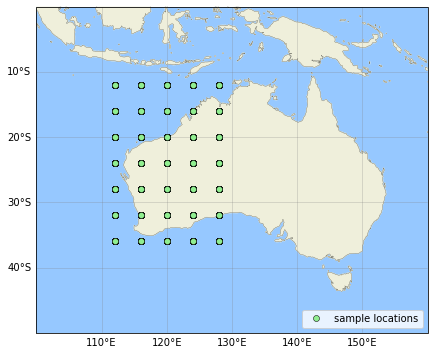

In [8]:
# Display sample cities on a map to verify (random) distribution

# Data
x_axis = hstr_data_df['longitude']
y_axis = hstr_data_df['latitude']

# Cartopy base map - https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/geoaxes.html
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,6))
#ax.set_global()  # show maximum extent supported by this projection
ax.set_extent([100, 160, -50, 0], crs=ccrs.PlateCarree())
ax.set_facecolor((150/255, 200/255, 255/255))  # background colour of plot
ax.coastlines(lw=0.2)  # lightly define coastlines
ax.add_feature(cartopy.feature.LAND)  # mask over background with land shape

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False
gl.right_labels = False

# Plot city locations
ax.plot(x_axis, y_axis, 'bo', ms=6, mfc='lightgreen', mec='black', mew=0.5, label='sample locations')
ax.legend(loc='lower right');
